# OKTAVIAN Aluminium benchmark analysis
The Osaka Aluminium Sphere Benchmark Experiment (OKTAVIAN) (December 22, 1988) is an intermediate quality neutronics experiment conducted to measure the leakage neutron spectrum from the outer surface of a aluminium sphere with a radius of 40 cm, using 14 MeV neutrons [1] [2] [3] [4] [5]. \
Neutronics code results are compared to the experiment measurements. \
Measurements include:
- Leakage Neutron
- Leakage Gamma

In the experiment, a pulsed beam line from the 14 MeV neutron source facility was used, where neutrons were produced by bombarding a 370 GBq tritium target with a 250 keV deuteron beam [6]. \
The gamma-rays were produced from (n,xg) reactions.

Neutron spectra were measured using the time-of-flight (TOF) technique, with a tritium target positioned at the center of the pile. A cylindrical NE-218 liquid organic scintillator, placed 11 meters from the target at a 55-degree angle relative to the deuteron beam axis, served as the neutron detector. A pre-collimator made of polyethylene-iron multi-layers was installed between the pile and the detector to minimize background neutrons, with an aperture size optimized to view the entire pile surface facing the detector.

Gamma-rays were detected using a cylindrical NaI crystal, and their energy spectra were derived from the unfolding of pulse-height spectra using a response matrix specific to the NaI detector. The detector was positioned 5.8 meters from the neutron source and recorded the gamma-rays emitted from the spherical target assembly. \

Model, experimental results and MCNP results were provided by the SINBAD repository [7].

In [1]:
import openmc_fusion_benchmarks as ofb
import matplotlib.pyplot as plt
import numpy as np

import helpers

### Extract experimental and codes results from results_database


In [2]:
# read conderc data
experiment_file = ofb.ResultsFromDatabase('experiment.h5', path='results_database')

In [3]:
# read openmc results in results_database/
openmc_endfb80_file = ofb.ResultsFromDatabase('openmc-0-14-0_endfb80.h5', path='results_database')
openmc_jeff33_file = ofb.ResultsFromDatabase('openmc-0-14-0_jeff33.h5', path='results_database')
openmc_fendl32_file = ofb.ResultsFromDatabase('openmc-0-14-0_fendl32.h5', path='results_database')

In [4]:
# read mcnp results in results_database/
mcnp_endfb80_file = ofb.ResultsFromDatabase('mcnp-6-1-1b_endfb80.h5', path='results_database')
mcnp_jeff33_file = ofb.ResultsFromDatabase('mcnp-6-1-1b_jeff33.h5', path='results_database')
mcnp_jendl40_file = ofb.ResultsFromDatabase('mcnp-6-2-17_jendl40.h5', path='results_database')
mcnp_tendl17_file = ofb.ResultsFromDatabase('mcnp-6-1-1b_tendl17.h5', path='results_database')

### Spectrometers - neutron energy spectra
Neutron energy spectra between 30 keV and 15 MeV measured by the time-of-flight technique using a 14 MeV  D-T neutron generator.

In [5]:
# experiment from results_database/
n21 = experiment_file.get_tally_dataframe('nspectrum')
g41 = experiment_file.get_tally_dataframe('gspectrum')

In [6]:
# openmc from results_database/
openmc_endfb80_n21 = openmc_endfb80_file.get_tally_dataframe('nspectrum')
openmc_endfb80_g41 = openmc_endfb80_file.get_tally_dataframe('gspectrum')

openmc_jeff33_n21 = openmc_jeff33_file.get_tally_dataframe('nspectrum')
openmc_jeff33_g41 = openmc_jeff33_file.get_tally_dataframe('gspectrum')

openmc_fendl32_n21 = openmc_fendl32_file.get_tally_dataframe('nspectrum')
openmc_fendl32_g41 = openmc_fendl32_file.get_tally_dataframe('gspectrum')

In [7]:
# mcnp from results_database/
mcnp_endfb80_n21 = mcnp_endfb80_file.get_tally_dataframe('nspectrum')
mcnp_endfb80_g41 = mcnp_endfb80_file.get_tally_dataframe('gspectrum')

mcnp_jeff33_n21 = mcnp_jeff33_file.get_tally_dataframe('nspectrum')
mcnp_jeff33_g41 = mcnp_jeff33_file.get_tally_dataframe('gspectrum')

mcnp_jendl40_n21 = mcnp_jendl40_file.get_tally_dataframe('nspectrum')
mcnp_jendl40_g41 = mcnp_jendl40_file.get_tally_dataframe('gspectrum')

mcnp_tendl17_n21 = mcnp_tendl17_file.get_tally_dataframe('nspectrum')
mcnp_tendl17_g41 = mcnp_tendl17_file.get_tally_dataframe('gspectrum')

In [8]:
ylabel_n = r'Neutron flux $(\frac{n}{cm^2 \cdot src \cdot lethargy})$'
tally_name = 'nspectrum'
xaxis = experiment_file.get_tally_xaxis(tally_name)

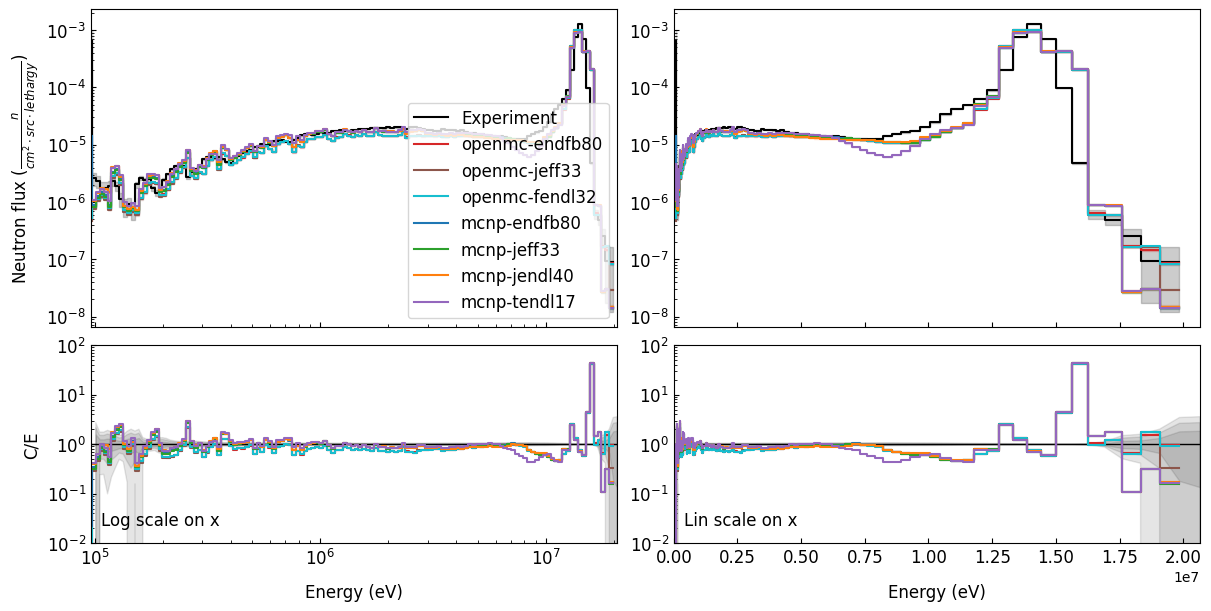

In [9]:
# preprocessing
n21 = ofb.rescale_to_lethargy(n21)
openmc_endfb80_n21 = ofb.rescale_to_lethargy(openmc_endfb80_n21)
openmc_jeff33_n21 = ofb.rescale_to_lethargy(openmc_jeff33_n21)
openmc_fendl32_n21 = ofb.rescale_to_lethargy(openmc_fendl32_n21)
mcnp_endfb80_n21 = ofb.rescale_to_lethargy(mcnp_endfb80_n21)
mcnp_jeff33_n21 = ofb.rescale_to_lethargy(mcnp_jeff33_n21)
mcnp_jendl40_n21 = ofb.rescale_to_lethargy(mcnp_jendl40_n21)
mcnp_tendl17_n21 = ofb.rescale_to_lethargy(mcnp_tendl17_n21)

# generate figure
plot = ofb.PlotEnergySpectra(xaxis=xaxis, ylabel=ylabel_n)
plot.add_reference_results(reference_data=n21, label='Experiment')
plot.add_computed_results(computed_data=openmc_endfb80_n21, color='tab:red', alpha=1, label='openmc-endfb80')
plot.add_computed_results(computed_data=openmc_jeff33_n21, color='tab:brown', alpha=1, label='openmc-jeff33')
plot.add_computed_results(computed_data=openmc_fendl32_n21, color='tab:cyan', alpha=1, label='openmc-fendl32')
plot.add_computed_results(computed_data=mcnp_endfb80_n21, color='tab:blue', alpha=1, label='mcnp-endfb80')
plot.add_computed_results(computed_data=mcnp_jeff33_n21, color='tab:green', alpha=1, label='mcnp-jeff33')
plot.add_computed_results(computed_data=mcnp_jendl40_n21, color='tab:orange', alpha=1, label='mcnp-jendl40')
plot.add_computed_results(computed_data=mcnp_tendl17_n21, color='tab:purple', alpha=1, label='mcnp-tendl17')

In [10]:
ylabel_g = r'Gamma flux $(\frac{n}{cm^2 \cdot src \cdot lethargy})$'
tally_name = 'gspectrum'
xaxis = experiment_file.get_tally_xaxis(tally_name)

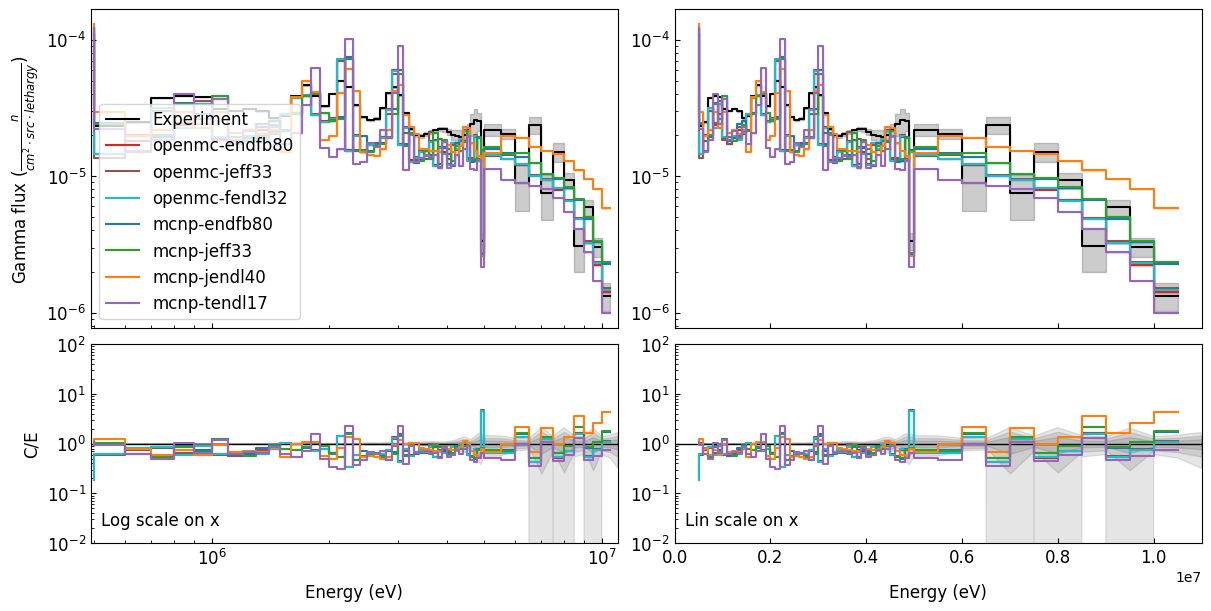

In [11]:
# preprocessing
g41 = ofb.rescale_to_lethargy(g41)
openmc_endfb80_g41 = ofb.rescale_to_lethargy(openmc_endfb80_g41)
openmc_jeff33_g41 = ofb.rescale_to_lethargy(openmc_jeff33_g41)
openmc_fendl32_g41 = ofb.rescale_to_lethargy(openmc_fendl32_g41)
mcnp_endfb80_g41 = ofb.rescale_to_lethargy(mcnp_endfb80_g41)
mcnp_jeff33_g41 = ofb.rescale_to_lethargy(mcnp_jeff33_g41)
mcnp_jendl40_g41 = ofb.rescale_to_lethargy(mcnp_jendl40_g41)
mcnp_tendl17_g41 = ofb.rescale_to_lethargy(mcnp_tendl17_g41)

# generate figure
plot = ofb.PlotEnergySpectra(xaxis=xaxis, ylabel=ylabel_g)
plot.add_reference_results(reference_data=g41, label='Experiment')
plot.add_computed_results(computed_data=openmc_endfb80_g41, color='tab:red', alpha=1, label='openmc-endfb80')
plot.add_computed_results(computed_data=openmc_jeff33_g41, color='tab:brown', alpha=1, label='openmc-jeff33')
plot.add_computed_results(computed_data=openmc_fendl32_g41, color='tab:cyan', alpha=1, label='openmc-fendl32')
plot.add_computed_results(computed_data=mcnp_endfb80_g41, color='tab:blue', alpha=1, label='mcnp-endfb80')
plot.add_computed_results(computed_data=mcnp_jeff33_g41, color='tab:green', alpha=1, label='mcnp-jeff33')
plot.add_computed_results(computed_data=mcnp_jendl40_g41, color='tab:orange', alpha=1, label='mcnp-jendl40')
plot.add_computed_results(computed_data=mcnp_tendl17_g41, color='tab:purple', alpha=1, label='mcnp-tendl17')

### References
[1] Ichihara, C., et al. "Proc. Int. Conf. on Nucl. Data for Sci. and Technol.", Mito, Japan, pp.319-322 (1988). \
[2] Ichihara, C., et al. "Proc. Second Specialists' Meeting on Nucl. Data for Fusion Reactors (1991)", JAERI-M 91-062 (1991). \
[3] Yamamoto, J. et al. "Gamma-Ray Emission Spectra from Spheres with 14 MeV Neutron Source", JAERI-M 89-026, 232 (1989). \
[4] Yamamoto J. et al. "Integral Experiment on Gamma-Ray Production at OKTAVIAN", JAERI-M 91-062, 118 (1991). \
[5] Maekawa, F., et al. "Data collection of fusion neutronics benchmark experiment conducted at FNS/JAERI". No. JAERI-DATA/CODE--98-021. Japan Atomic Energy Research Inst., 1998. \
[6] Sumita K., et al. "Proc. 12th SOFT", Vol. 1 (1982) \
[7] Kodeli, I. A., et al. "SINBAD–Radiation shielding benchmark experiments." Annals of Nuclear Energy 159 (2021): 108254. https://doi.org/10.1016/j.anucene.2021.108254 